# Fronius 

## Settings

In [1]:
import requests
import json
import warnings
import datetime
import dateutil
import pandas as pd

import fronius
from fronius import FroniusInverter
from fronius import FroniusArchiveJson

from IPython.display import display, HTML, Markdown
import matplotlib.pyplot as plt
import matplotlib

kluis17 = "192.168.1.154"
kluis17_Installation_time = datetime.datetime(2017, 10, 11)


In [2]:
host = None
fi = FroniusInverter(kluis17)

fi.getInverterRealTimeData()

http://192.168.1.154/solar_api/v1/GetInverterRealtimeData.cgi


{'Body': {'Data': {'DAY_ENERGY': {'Unit': 'Wh', 'Values': {'1': 2758}},
   'PAC': {'Unit': 'W', 'Values': {'1': 1138}},
   'TOTAL_ENERGY': {'Unit': 'Wh', 'Values': {'1': 166244}},
   'YEAR_ENERGY': {'Unit': 'Wh', 'Values': {'1': 166244}}}},
 'Head': {'RequestArguments': {'DeviceClass': 'Inverter', 'Scope': 'System'},
  'Status': {'Code': 0, 'Reason': '', 'UserMessage': ''},
  'Timestamp': '2017-10-25T11:41:50+02:00'}}

In [3]:
fi = FroniusInverter(kluis17)
fi.findEarliestData()

http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-09-01 00:00:00 -> 2017-09-15 00:00:00
http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-09-15 00:00:00 -> 2017-09-29 00:00:00
http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-09-29 00:00:00 -> 2017-10-13 00:00:00


datetime.datetime(2017, 10, 11, 15, 5, tzinfo=tzoffset(None, 7200))

In [4]:
fi = FroniusInverter(kluis17)
channels = fi.getChannels()

display(Markdown("**Defined channels**"))
display(channels)

**Defined channels**

['TimeSpanInSec',
 'Digital_PowerManagementRelay_Out_1',
 'EnergyReal_WAC_Sum_Produced',
 'Current_DC_String_1',
 'Current_DC_String_2',
 'Voltage_DC_String_1',
 'Voltage_DC_String_2',
 'Temperature_Powerstage',
 'Voltage_AC_Phase_1',
 'Voltage_AC_Phase_2',
 'Voltage_AC_Phase_3',
 'Current_AC_Phase_1',
 'Current_AC_Phase_2',
 'Current_AC_Phase_3',
 'PowerReal_PAC_Sum',
 'EnergyReal_WAC_Minus_Absolute',
 'EnergyReal_WAC_Plus_Absolute',
 'Meter_Location_Current',
 'Temperature_Channel_1',
 'Temperature_Channel_2',
 'Digital_Channel_1',
 'Digital_Channel_2',
 'Radiation',
 'Hybrid_Operating_State']

In [5]:
fi = FroniusInverter(kluis17)
data = fi.getHistoricalData(datetime.datetime.now() - datetime.timedelta(hours=1), datetime.datetime.now(), channels)
for key, value in data.items():
    display(Markdown("**"+str(key)+"**"))
    display(value)
    display(Markdown("\n"))



http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-10-25 10:42:12.532125 -> 2017-10-25 11:42:12.532125


**datamanager:/dc/f0056cc6/**

,ts,Digital_PowerManagementRelay_Out_1
0,2017-10-25 07:54:29+02:00,0


**inverter/1**

,ts,Current_AC_Phase_1,Current_DC_String_1,Current_DC_String_2,EnergyReal_WAC_Sum_Produced,PowerReal_PAC_Sum,Temperature_Powerstage,TimeSpanInSec,Voltage_AC_Phase_1,Voltage_DC_String_1,Voltage_DC_String_2
0,2017-10-25 03:35:00+02:00,0.00,0.00,0.00,0.000000,0.000,NaN,72,NaN,0.5,0.3
1,2017-10-25 00:30:00+02:00,0.00,0.00,0.00,0.000000,0.000,NaN,53,NaN,0.8,0.5
2,2017-10-25 06:40:00+02:00,0.00,0.00,0.00,0.000000,0.000,NaN,71,NaN,0.6,0.4
3,2017-10-25 07:55:00+02:00,0.00,0.00,0.00,0.000000,0.000,NaN,82,NaN,11.8,11.6
4,2017-10-25 08:00:00+02:00,0.00,0.00,0.00,0.000000,0.000,NaN,51,NaN,16.8,16.7
5,2017-10-25 08:05:00+02:00,0.00,0.00,0.00,0.000000,0.000,0.0,279,0.0,33.6,33.4
6,2017-10-25 08:10:00+02:00,0.00,0.00,0.00,0.000000,0.000,0.0,302,0.0,79.2,57.4
7,2017-10-25 08:15:00+02:00,0.00,0.00,0.00,0.000000,0.000,0.0,297,0.0,182.4,76.6
8,2017-10-25 08:20:00+02:00,0.00,0.00,0.00,0.000000,0.000,0.0,302,0.0,213.8,83.4
9,2017-10-25 08:25:00+02:00,0.00,0.00,0.00,0.000000,0.000,0.0,297,0.0,227.3,88.9


In [6]:
fi = FroniusInverter(kluis17)
data = fi.getHistoricalDataJson(datetime.datetime.now() - datetime.timedelta(hours=1), datetime.datetime.now(), 
                            ["Digital_PowerManagementRelay_Out_1", "TimeSpanInSec"])

data


http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-10-25 10:42:25.858004 -> 2017-10-25 11:42:25.858004


{'Body': {'Data': {'datamanager:/dc/f0056cc6/': {'Data': {'Digital_PowerManagementRelay_Out_1': {'Unit': '1',
      'Values': {'28469': 0},
      '_comment': 'channelId=123407124'}},
    'End': '2017-10-25T23:59:59+02:00',
    'Start': '2017-10-25T00:00:00+02:00'},
   'inverter/1': {'Data': {'TimeSpanInSec': {'Unit': 'sec',
      'Values': {'12900': 72,
       '1800': 53,
       '24000': 71,
       '28500': 82,
       '28800': 51,
       '29100': 279,
       '29400': 302,
       '29700': 297,
       '30000': 302,
       '30300': 297,
       '30600': 302,
       '30900': 297,
       '31200': 302,
       '31500': 297,
       '31800': 302,
       '32100': 302,
       '32400': 297,
       '32700': 302,
       '33000': 297,
       '33300': 302,
       '33600': 297,
       '33900': 302,
       '34200': 297,
       '34500': 302,
       '34800': 297,
       '35100': 302,
       '35400': 297,
       '35700': 302,
       '36000': 297,
       '36300': 302,
       '36600': 297,
       '36900': 302

## Fronius configuration

explores which channels are reported, and which channels remain empty

In [8]:
# setup the inverter object
fi = FroniusInverter(kluis17)

# fetch a a couple of days of recent data
all_channels = list(fi.getChannels())
jsondata=fi.getHistoricalDataJson(datetime.datetime.now() - datetime.timedelta(days=1), datetime.datetime.now(), all_channels)

# pass the 
faj = FroniusArchiveJson(jsondata)
data = faj.data()
devices = faj.device_ids()

channelsReported = []
for device in data:
    df=data[device]
    columns=list(df.columns)
    display(Markdown("**"+str(device)+"**"))
    for c in sorted(columns[1:]):
        print("\t", c)            
    channelsReported +=columns[1:]

missingChannels=all_channels
for c in channelsReported:
    missingChannels.remove(c)

display(Markdown("**"+str("Missing :")+"**"))
for c in sorted(missingChannels):
        print("\t", c) 

http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-10-24 11:43:27.796439 -> 2017-10-25 11:43:27.796439


**datamanager:/dc/f0056cc6/**

	 Digital_PowerManagementRelay_Out_1


**inverter/1**

	 Current_AC_Phase_1
	 Current_DC_String_1
	 Current_DC_String_2
	 EnergyReal_WAC_Sum_Produced
	 PowerReal_PAC_Sum
	 Temperature_Powerstage
	 TimeSpanInSec
	 Voltage_AC_Phase_1
	 Voltage_DC_String_1
	 Voltage_DC_String_2


**Missing :**

	 Current_AC_Phase_2
	 Current_AC_Phase_3
	 Digital_Channel_1
	 Digital_Channel_2
	 EnergyReal_WAC_Minus_Absolute
	 EnergyReal_WAC_Plus_Absolute
	 Hybrid_Operating_State
	 Meter_Location_Current
	 Radiation
	 Temperature_Channel_1
	 Temperature_Channel_2
	 Voltage_AC_Phase_2
	 Voltage_AC_Phase_3


# daily graphs

In [9]:
# setup the inverter object
fi = FroniusInverter(kluis17)

channels = ["Current_DC_String_1", "Current_DC_String_2"]
channels = [ "Current_DC_String_2"]

# fetch a a couple of days of recent data
day=datetime.datetime(year=2017, month=10, day=1)
duration = 30

data20171020 = fi.getHistoricalData(day, day + datetime.timedelta(days=duration) -datetime.timedelta(seconds=1))


http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-10-01 00:00:00 -> 2017-10-16 23:59:59
http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-10-17 00:00:00 -> 2017-10-30 23:59:59


In [10]:
data20171020_json = fi.getHistoricalDataJson(day, day + datetime.timedelta(days=duration) -datetime.timedelta(seconds=1))
data20171020_json

http://192.168.1.154/solar_api/v1/GetArchiveData.cgi 2017-10-01 00:00:00 -> 2017-10-30 23:59:59


{'Body': {'Data': {}},
 'Head': {'RequestArguments': {'Channel': 'Hybrid_Operating_State',
   'EndDate': '2017-10-29T23:59:59+01:00',
   'HumanReadable': 'True',
   'Scope': 'System',
   'SeriesType': 'Detail',
   'StartDate': '2017-10-01T00:00:00+02:00'},
  'Status': {'Code': 255,
   'ErrorDetail': {'Nodes': []},
   'Reason': 'Query interval is restricted to 16 days',
   'UserMessage': ''},
  'Timestamp': '2017-10-25T11:44:15+02:00'}}

In [11]:
data20171020_json

{'Body': {'Data': {}},
 'Head': {'RequestArguments': {'Channel': 'Hybrid_Operating_State',
   'EndDate': '2017-10-29T23:59:59+01:00',
   'HumanReadable': 'True',
   'Scope': 'System',
   'SeriesType': 'Detail',
   'StartDate': '2017-10-01T00:00:00+02:00'},
  'Status': {'Code': 255,
   'ErrorDetail': {'Nodes': []},
   'Reason': 'Query interval is restricted to 16 days',
   'UserMessage': ''},
  'Timestamp': '2017-10-25T11:44:15+02:00'}}

In [12]:
inverterData = data20171020['inverter/1']
inverterData

,ts,Current_AC_Phase_1,Current_DC_String_1,Current_DC_String_2,EnergyReal_WAC_Sum_Produced,PowerReal_PAC_Sum,Temperature_Powerstage,TimeSpanInSec,Voltage_AC_Phase_1,Voltage_DC_String_1,Voltage_DC_String_2
655,2017-10-11 15:05:00+02:00,3.00,1.34,1.25,42.044444,671.400,19.0,350,223.8,354.4,137.3
656,2017-10-11 15:10:00+02:00,3.11,1.39,1.25,59.759722,718.099,22.0,299,230.9,397.3,155.0
657,2017-10-11 15:15:00+02:00,2.14,1.01,0.89,11.019722,467.804,25.0,174,218.6,389.4,149.8
658,2017-10-11 15:20:00+02:00,2.34,1.06,1.00,45.524444,541.008,27.0,302,231.2,393.8,149.2
659,2017-10-11 15:25:00+02:00,2.46,1.11,1.05,47.938333,568.752,29.0,302,231.2,394.7,148.5
660,2017-10-11 15:30:00+02:00,2.76,1.24,1.11,52.595278,636.732,31.0,297,230.7,396.7,152.3
661,2017-10-11 15:35:00+02:00,2.78,1.26,1.10,53.976667,641.624,33.0,302,230.8,396.3,153.5
662,2017-10-11 15:40:00+02:00,2.29,1.06,0.89,43.893611,531.280,35.0,297,232.0,393.9,154.4
663,2017-10-11 15:45:00+02:00,2.59,1.17,1.05,50.237222,598.808,37.0,302,231.2,394.6,153.5
664,2017-10-11 15:50:00+02:00,3.86,1.63,1.76,74.232500,897.064,37.0,297,232.4,400.3,158.3


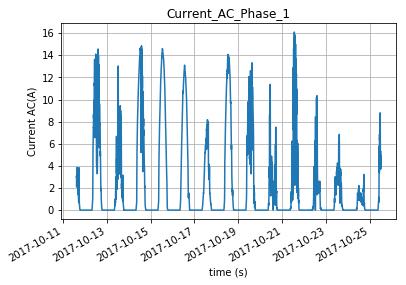

In [13]:
fig, ax = plt.subplots()

d=inverterData
t=d["ts"]
s=d["Current_AC_Phase_1"]
ax.plot(t, s)
#ax.plot(t, t)

ax.set(xlabel='time (s)', ylabel='Current AC(A)',
       title='Current_AC_Phase_1')
ax.grid()
plt.gcf().autofmt_xdate()

plt.show()

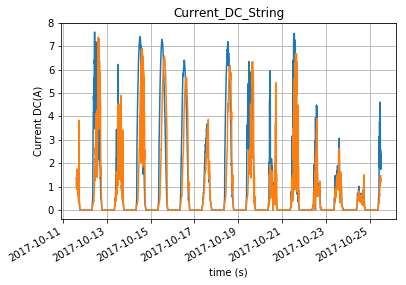

In [14]:
fig, ax = plt.subplots()

d=inverterData
#d=(d.sort_values('ts'))
t=d["ts"]
s1=d["Current_DC_String_1"]
ax.plot(t, s1)

s2=d["Current_DC_String_2"]
ax.plot(t, s2)

ax.set(xlabel='time (s)', ylabel='Current DC(A)',
       title='Current_DC_String')
ax.grid()
plt.gcf().autofmt_xdate()


plt.show()

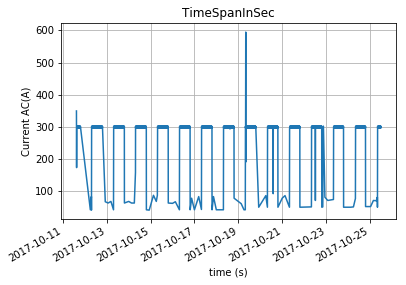

In [15]:
fig, ax = plt.subplots()

d=inverterData
#d=(d.sort_values('ts'))
t=d["ts"]
s=d["TimeSpanInSec"]
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='Current AC(A)',
       title='TimeSpanInSec')
ax.grid()
plt.gcf().autofmt_xdate()


plt.show()

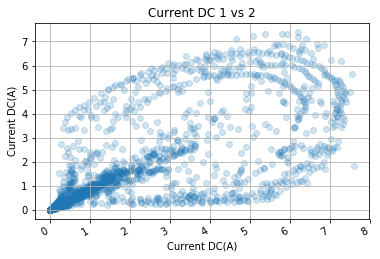

In [16]:
fig, ax = plt.subplots()

d=inverterData
#d=(d.sort_values('ts'))
t=d["ts"]
s1=d["Current_DC_String_1"]
s2=d["Current_DC_String_2"]

ax.scatter(s1, s2, alpha=.2)

ax.set(xlabel='Current DC(A)', ylabel='Current DC(A)',
       title='Current DC 1 vs 2')
ax.grid()
plt.gcf().autofmt_xdate()


plt.show()

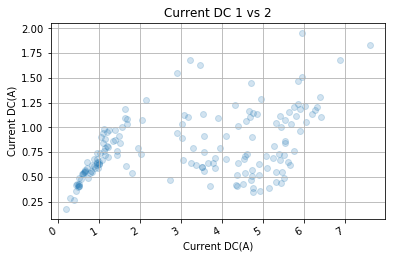

In [17]:
fig, ax = plt.subplots()

d=inverterData
#d=(d.sort_values('ts'))
d['tod'] = d.ts.apply(lambda t : t.hour)

d=d[d.tod == 10]

s1=d["Current_DC_String_1"]
s2=d["Current_DC_String_2"]

ax.scatter(s1, s2, alpha=.2)

ax.set(xlabel='Current DC(A)', ylabel='Current DC(A)',
       title='Current DC 1 vs 2')
ax.grid()
plt.gcf().autofmt_xdate()


plt.show()

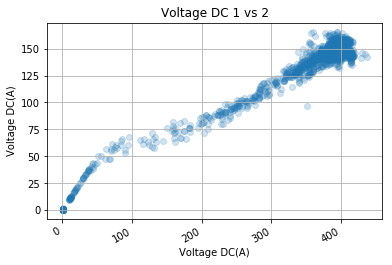

In [18]:
fig, ax = plt.subplots()

d=inverterData
#d=(d.sort_values('ts'))
t=d["ts"]
s1=d["Voltage_DC_String_1"]
s2=d["Voltage_DC_String_2"]

ax.scatter(s1, s2, alpha=.2)

ax.set(xlabel='Voltage DC(A)', ylabel='Voltage DC(A)',
       title='Voltage DC 1 vs 2')
ax.grid()
plt.gcf().autofmt_xdate()


plt.show()

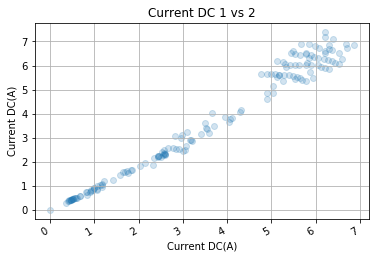

In [19]:
fig, ax = plt.subplots()

d=inverterData
#d=(d.sort_values('ts'))
d['Current_DC'] = d["Current_DC_String_1"] + d["Current_DC_String_2"]

d=d[d.tod == 14]

s1=d["Current_DC_String_1"]
s2=d["Current_DC_String_2"]

ax.scatter(s1, s2, alpha=.2)

ax.set(xlabel='Current DC(A)', ylabel='Current DC(A)',
       title='Current DC 1 vs 2')
ax.grid()
plt.gcf().autofmt_xdate()


plt.show()